<a href="https://colab.research.google.com/github/duongDSAI64/ThiTHPT/blob/master/phantich2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use(
    'ggplot')
plt.rcParams['figure.figsize'] = (20, 7)

In [59]:
data = pd.read_csv(r"https://raw.githubusercontent.com/duongDSAI64/ThiTHPT/master/Diemthi2021.csv", encoding = "Latin-1")
data

,SBD,Toan,Ngu_van,Ngoai_ngu,Vat_ly,Hoa_hoc,Sinh_hoc,Lich_su,Dia_ly,GDCD,Cum_thi
0,1000001,2.2,3.50,NaN,NaN,NaN,NaN,2.50,5.50,NaN,1
1,1000002,9.2,8.25,10.0,NaN,NaN,NaN,5.75,9.75,9.25,1
2,1000003,4.4,6.25,NaN,NaN,NaN,NaN,4.25,4.00,NaN,1
3,1000004,8.4,6.75,10.0,4.00,3.00,3.50,NaN,NaN,NaN,1
4,1000005,8.8,8.25,9.4,8.25,5.75,5.25,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
988008,64006834,8.6,8.25,6.2,8.25,7.00,6.50,NaN,NaN,NaN,64
988009,64006835,9.0,7.50,9.4,8.00,8.25,5.50,NaN,NaN,NaN,64
988010,64006836,4.8,7.00,4.6,NaN,NaN,NaN,3.75,7.00,9.00,64
988011,64006837,7.4,7.75,9.4,NaN,NaN,NaN,4.50,6.75,9.25,64


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988013 entries, 0 to 988012
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SBD        988013 non-null  int64  
 1   Toan       977661 non-null  float64
 2   Ngu_van    974732 non-null  float64
 3   Ngoai_ngu  868665 non-null  float64
 4   Vat_ly     345541 non-null  float64
 5   Hoa_hoc    347178 non-null  float64
 6   Sinh_hoc   341745 non-null  float64
 7   Lich_su    634562 non-null  float64
 8   Dia_ly     628715 non-null  float64
 9   GDCD       532168 non-null  float64
 10  Cum_thi    988013 non-null  int64  
 11  A          343889 non-null  float64
 12  B          341697 non-null  float64
 13  C          628324 non-null  float64
 14  A1         332919 non-null  float64
 15  D1         865349 non-null  float64
 16  A-BK       343889 non-null  float64
 17  A1-BK      332919 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 135.7 MB


### **Số lượng theo cụm thi**

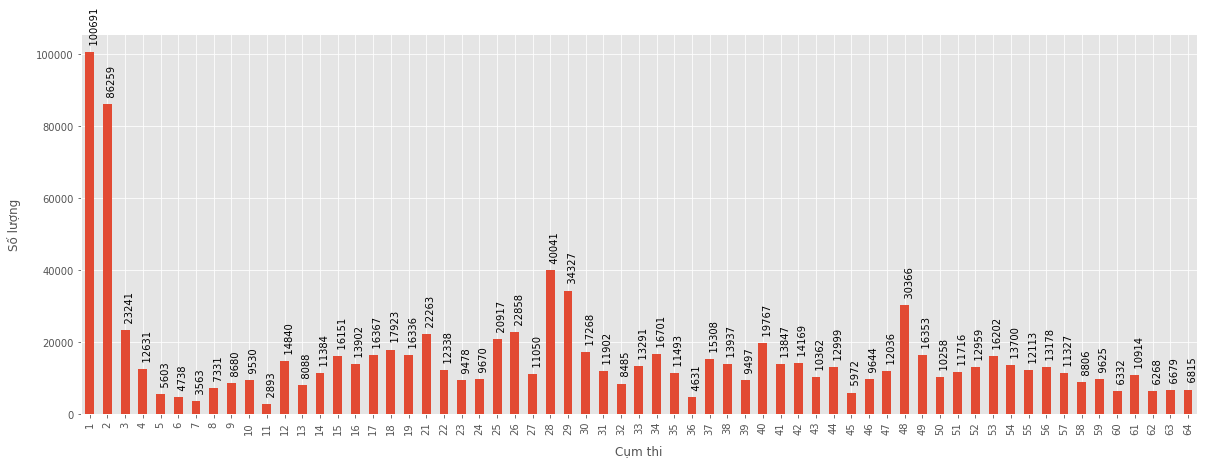

In [66]:
count_tinh = data['Cum_thi'].value_counts().sort_index()
plt.xlabel('Cụm thi', labelpad = 10)
plt.ylabel('Số lượng', labelpad = 15)
for index, value in enumerate(count_tinh.values):
    plt.text(index, value, '   ' + str(value), rotation = 90)
count_tinh.plot.bar()

### **Tính điểm các khối**

In [60]:
data['A'] = data['Toan']+data['Vat_ly']+data['Hoa_hoc']
data['B'] = data['Toan']+data['Sinh_hoc']+data['Hoa_hoc']
data['C'] = data['Ngu_van']+data['Lich_su']+data['Dia_ly']
data['A1'] = data['Toan'] + data['Ngoai_ngu'] + data['Vat_ly']
data['D1'] = data['Toan'] + data['Ngu_van'] + data['Ngoai_ngu']
data['A-BK'] = (2*data['Toan']+data['Vat_ly']+data['Hoa_hoc'])*0.75
data['A1-BK'] = (2*data['Toan'] + data['Ngoai_ngu'] + data['Vat_ly'])*0.75 

### **Phổ điểm**

In [61]:
data

,SBD,Toan,Ngu_van,Ngoai_ngu,Vat_ly,Hoa_hoc,Sinh_hoc,Lich_su,Dia_ly,GDCD,Cum_thi,A,B,C,A1,D1,A-BK,A1-BK
0,1000001,2.2,3.50,NaN,NaN,NaN,NaN,2.50,5.50,NaN,1,NaN,NaN,11.50,NaN,NaN,NaN,NaN
1,1000002,9.2,8.25,10.0,NaN,NaN,NaN,5.75,9.75,9.25,1,NaN,NaN,23.75,NaN,27.45,NaN,NaN
2,1000003,4.4,6.25,NaN,NaN,NaN,NaN,4.25,4.00,NaN,1,NaN,NaN,14.50,NaN,NaN,NaN,NaN
3,1000004,8.4,6.75,10.0,4.00,3.00,3.50,NaN,NaN,NaN,1,15.40,14.90,NaN,22.40,25.15,17.8500,23.1000
4,1000005,8.8,8.25,9.4,8.25,5.75,5.25,NaN,NaN,NaN,1,22.80,19.80,NaN,26.45,26.45,23.7000,26.4375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988008,64006834,8.6,8.25,6.2,8.25,7.00,6.50,NaN,NaN,NaN,64,23.85,22.10,NaN,23.05,23.05,24.3375,23.7375
988009,64006835,9.0,7.50,9.4,8.00,8.25,5.50,NaN,NaN,NaN,64,25.25,22.75,NaN,26.40,25.90,25.6875,26.5500
988010,64006836,4.8,7.00,4.6,NaN,NaN,NaN,3.75,7.00,9.00,64,NaN,NaN,17.75,NaN,16.40,NaN,NaN
988011,64006837,7.4,7.75,9.4,NaN,NaN,NaN,4.50,6.75,9.25,64,NaN,NaN,19.00,NaN,24.55,NaN,NaN


In [62]:
def phodiem(data, mon_hoc, title):
  data_show = []
  if (len(mon_hoc)<3 or ('-' in mon_hoc)):
    bins = [i/2 for i in range(0,61)]
    data_show = data[mon_hoc].value_counts(bins = bins).sort_index()
  elif (mon_hoc == 'Ngu_van'):
    bins = [i/4 for i in range(0,41)]
    data_show = data[mon_hoc].value_counts(bins = bins).sort_index()
  else:
    data_show = data[mon_hoc].value_counts().sort_index()

  data_show.plot(kind='bar', colormap='plasma')

  font = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 12,
          }
  font_title = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }
  
  plt.grid(c='white', linewidth=2, fillstyle='full', b=True)
  plt.ylim(0, data_show.values.max()*1.4)
  plt.xlabel('Điểm', labelpad = 10)
  plt.ylabel('Số lượng', labelpad = 15)
  plt.title(title)
  plt.tight_layout()
  for index, value in enumerate(data_show.values):
    plt.text(index, value, '   ' + str(value), rotation = 90)  
  data_show.plot.bar()
  plt.show()
 

In [68]:
ma_Monhoc = [
    {'Mon_hoc':'Toan', 'Ten': 'Toán'},
    {'Mon_hoc':'Ngu_van', 'Ten': 'Ngữ Văn'},
    {'Mon_hoc':'Ngoai_ngu', 'Ten': 'Tiếng Anh'},
    {'Mon_hoc':'Hoa_hoc', 'Ten': 'Hóa học'},
    {'Mon_hoc':'Sinh_hoc', 'Ten': 'Sinh hoc'},
    {'Mon_hoc':'Vat_ly', 'Ten': 'Vật lý'},
    {'Mon_hoc':'Lich_su', 'Ten': 'Lịch sử'},
    {'Mon_hoc':'Dia_ly', 'Ten': 'Địa lý'},
    {'Mon_hoc':'GDCD', 'Ten': 'Giáo dục công dân'},
    {'Mon_hoc':'A', 'Ten': 'Khối A'},
    {'Mon_hoc':'B', 'Ten': 'Khối B'},
    {'Mon_hoc':'C', 'Ten': 'Khối C'},
    {'Mon_hoc':'D1', 'Ten': 'Khối D1'},
    {'Mon_hoc':'A1', 'Ten': 'Khối A1'},
    {'Mon_hoc':'A-BK', 'Ten': 'Khối A theo BK'},
    {'Mon_hoc':'A1-BK', 'Ten': 'Khối A1 theo BK'}
]

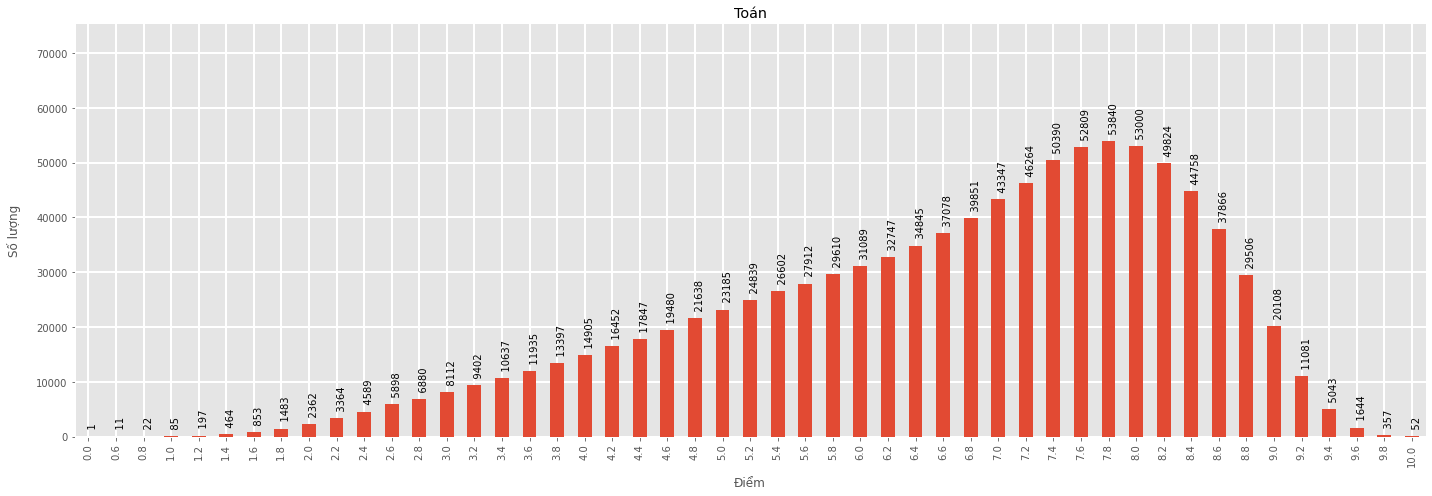

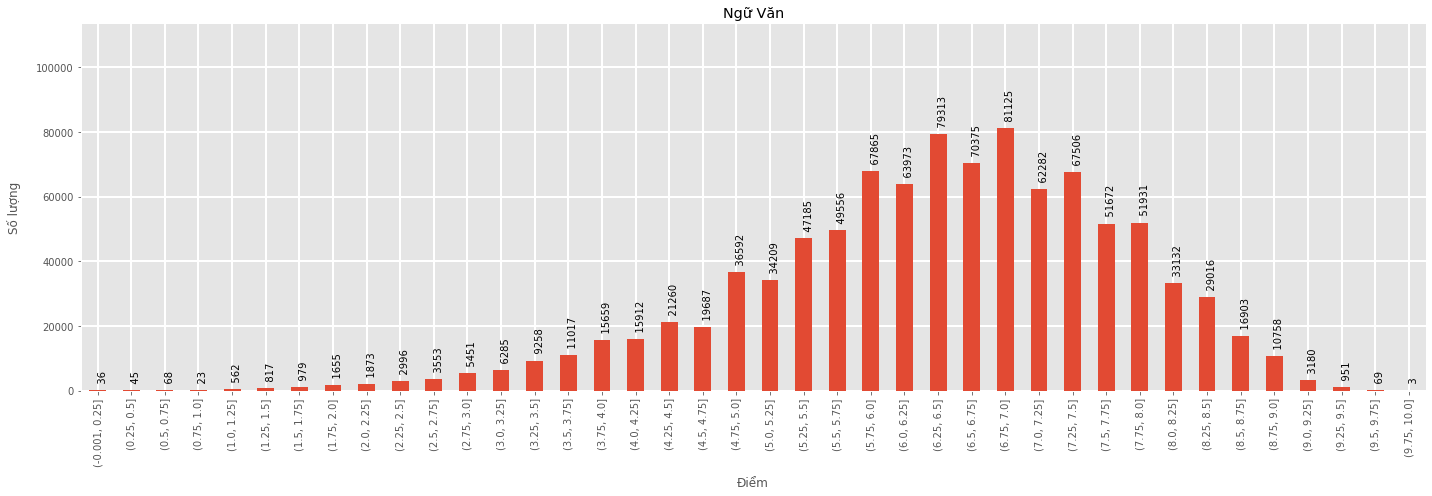

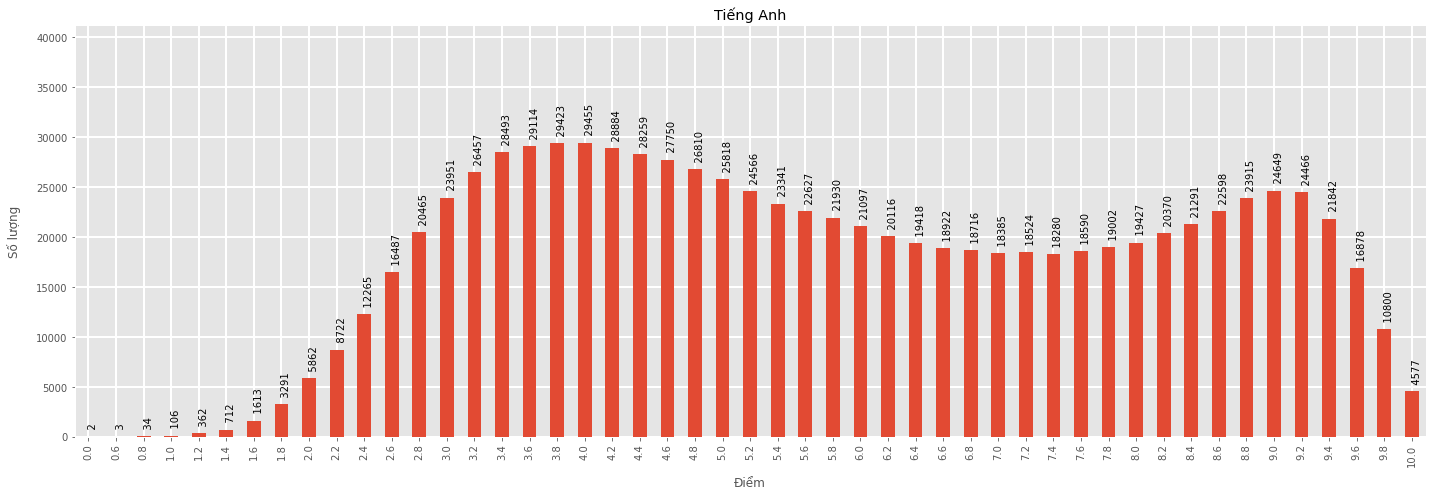

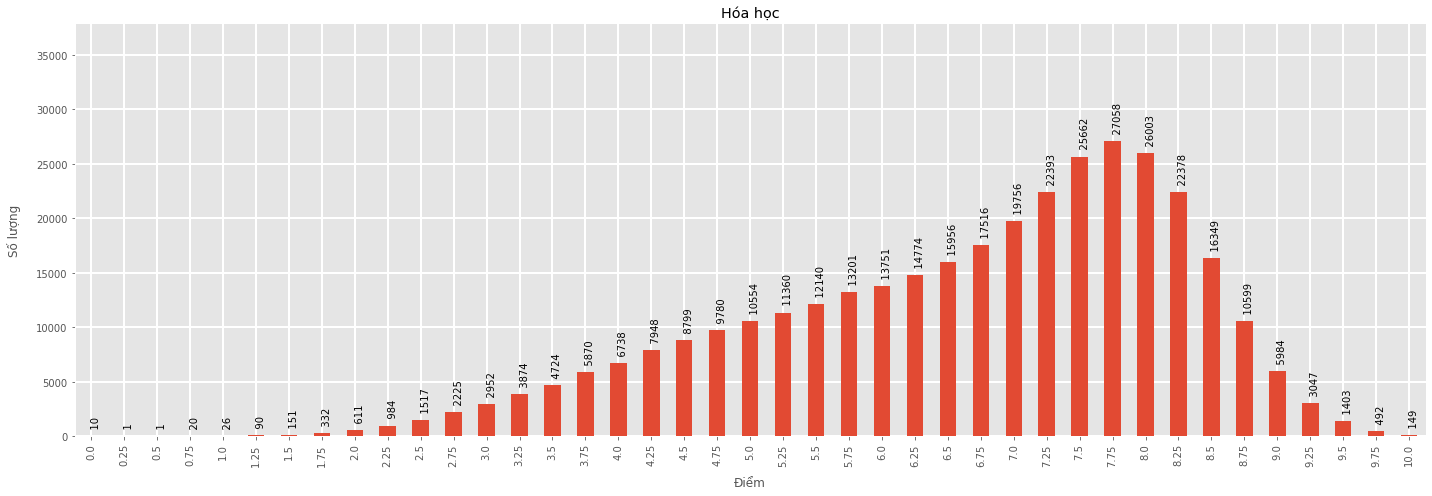

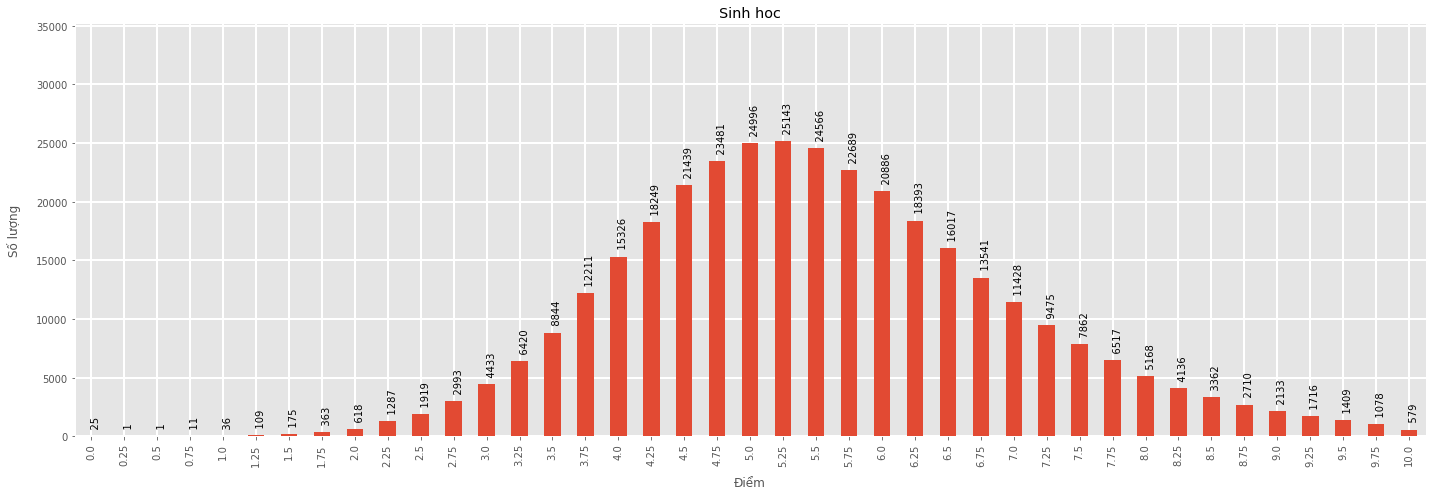

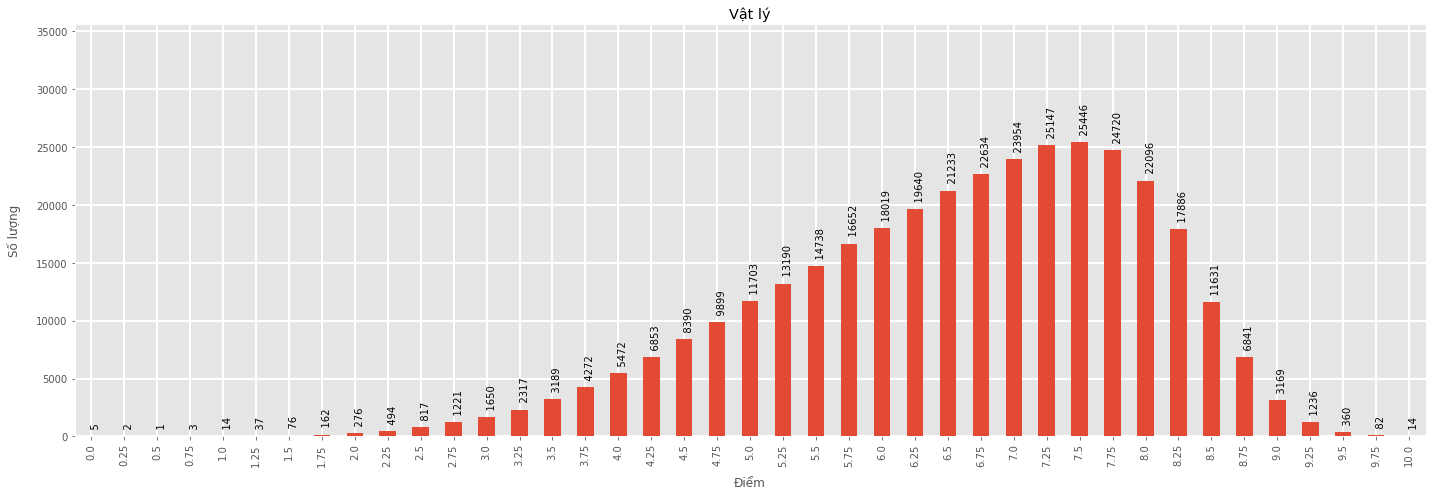

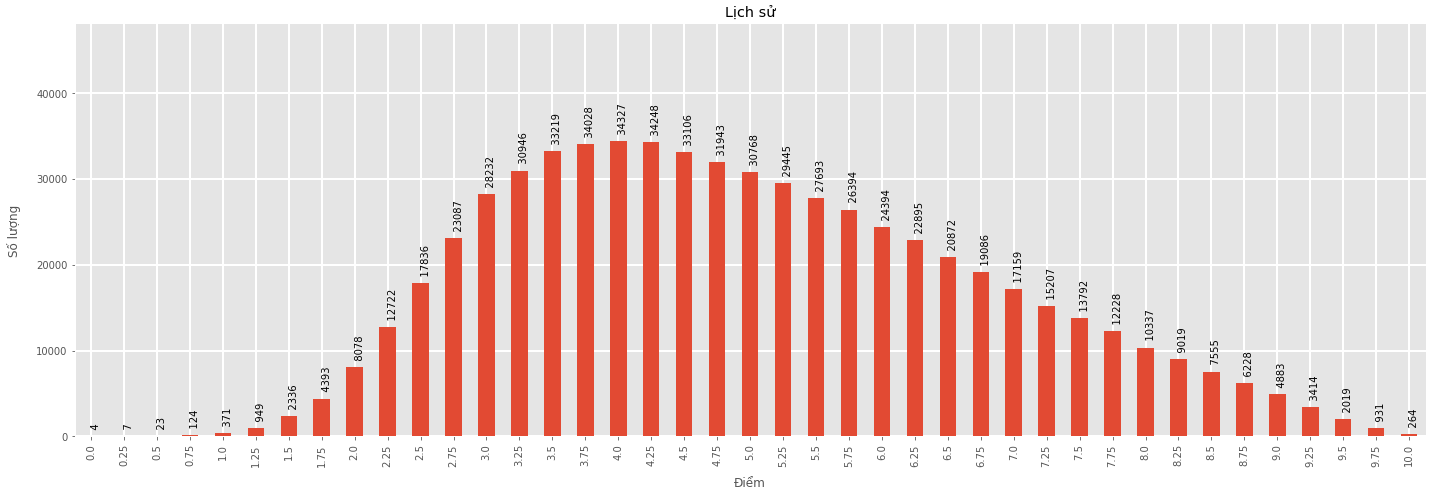

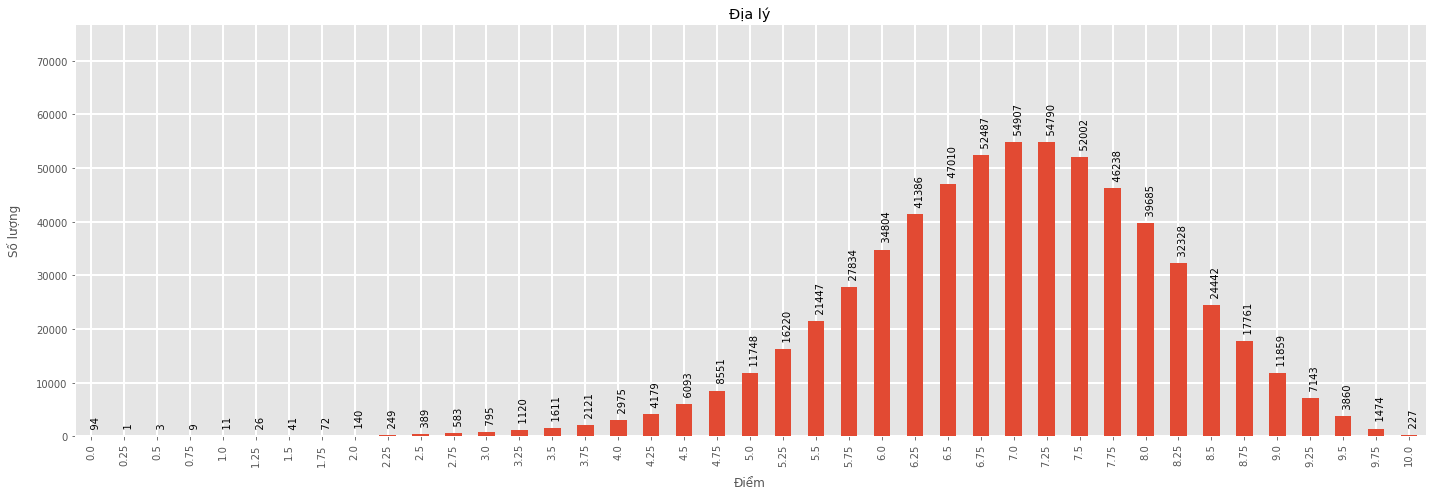

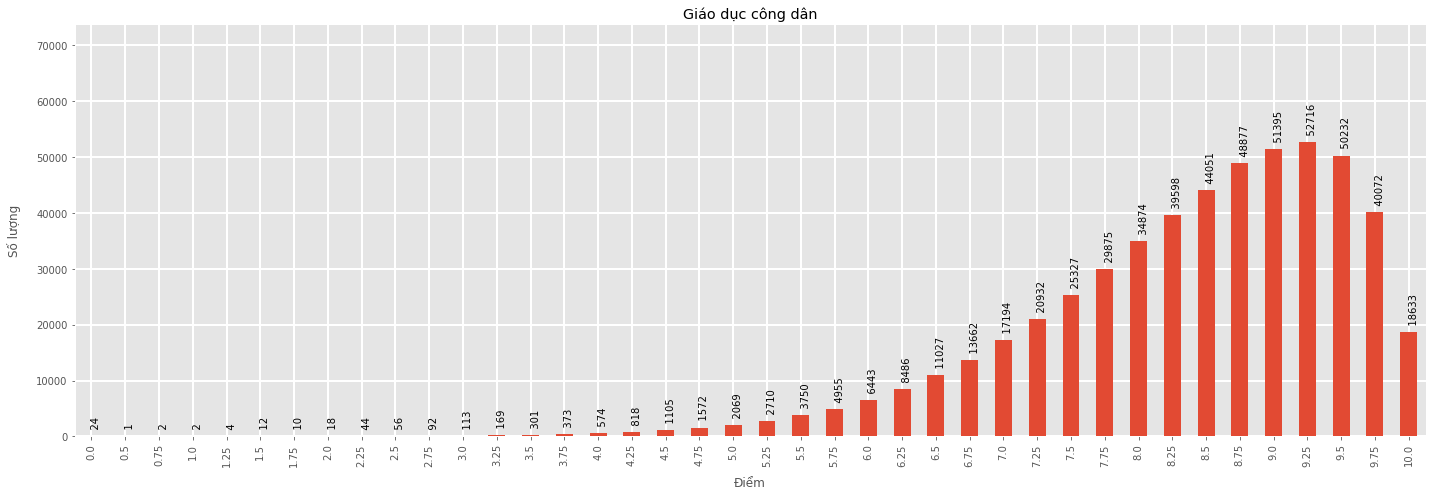

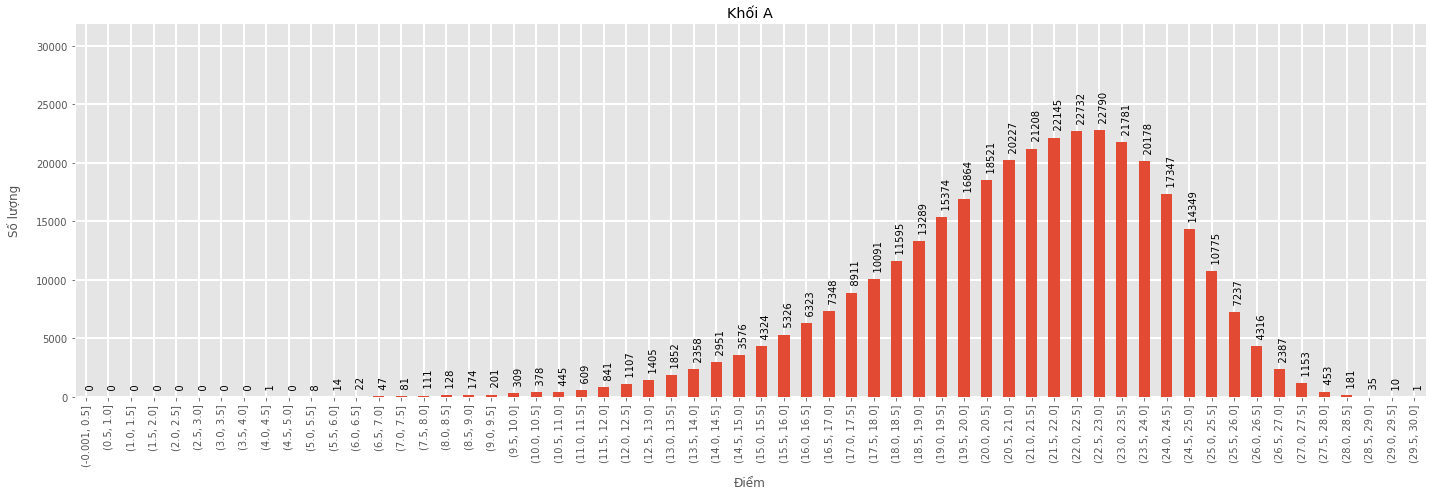

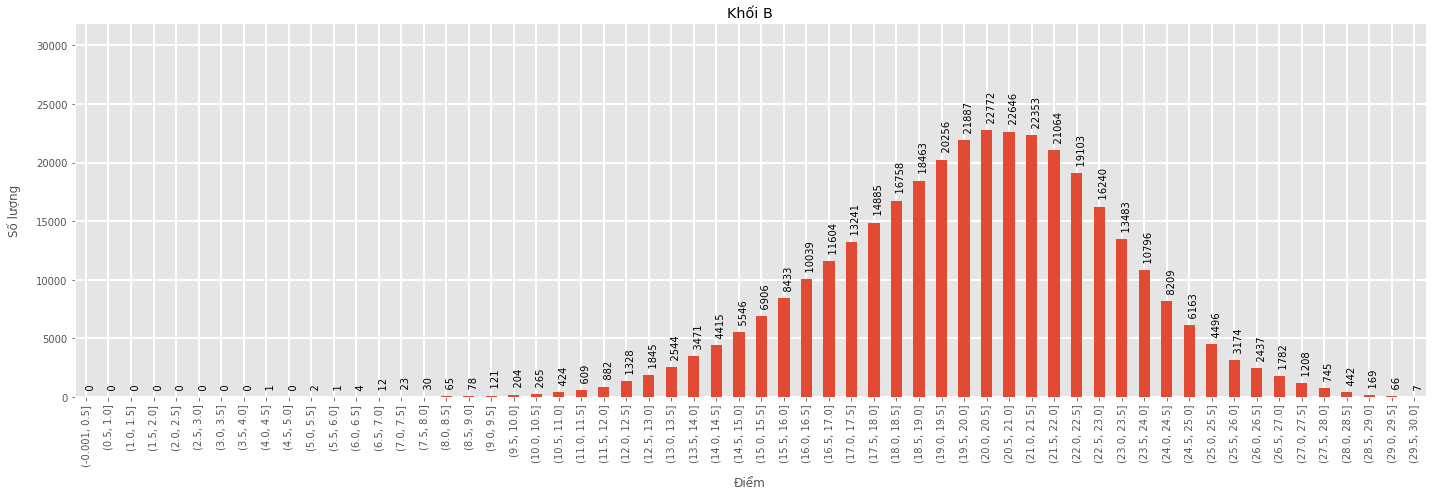

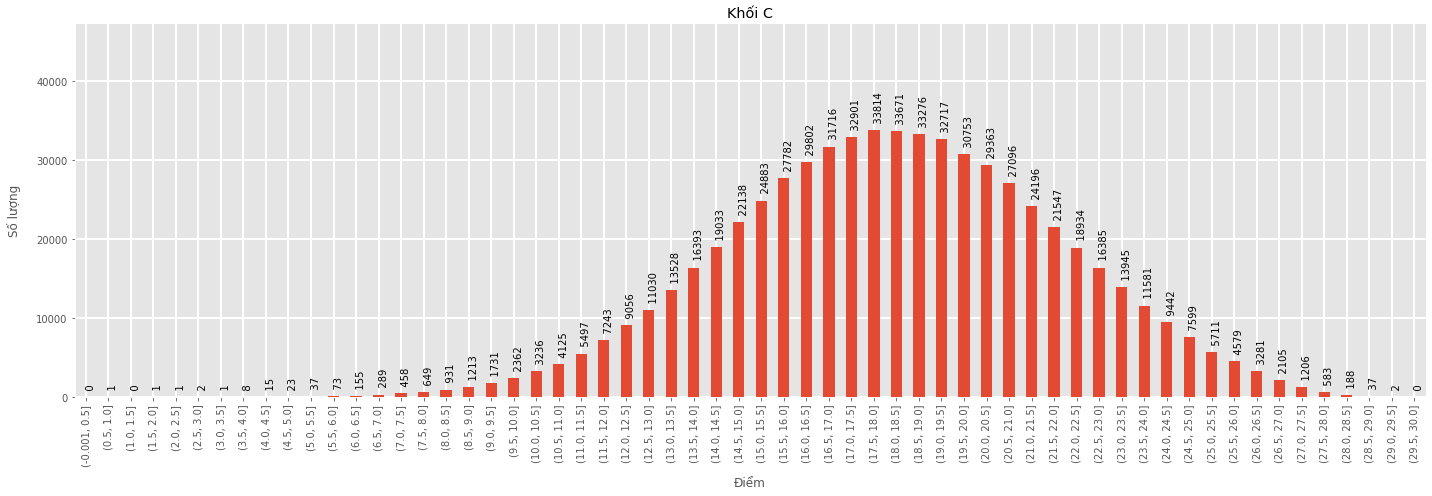

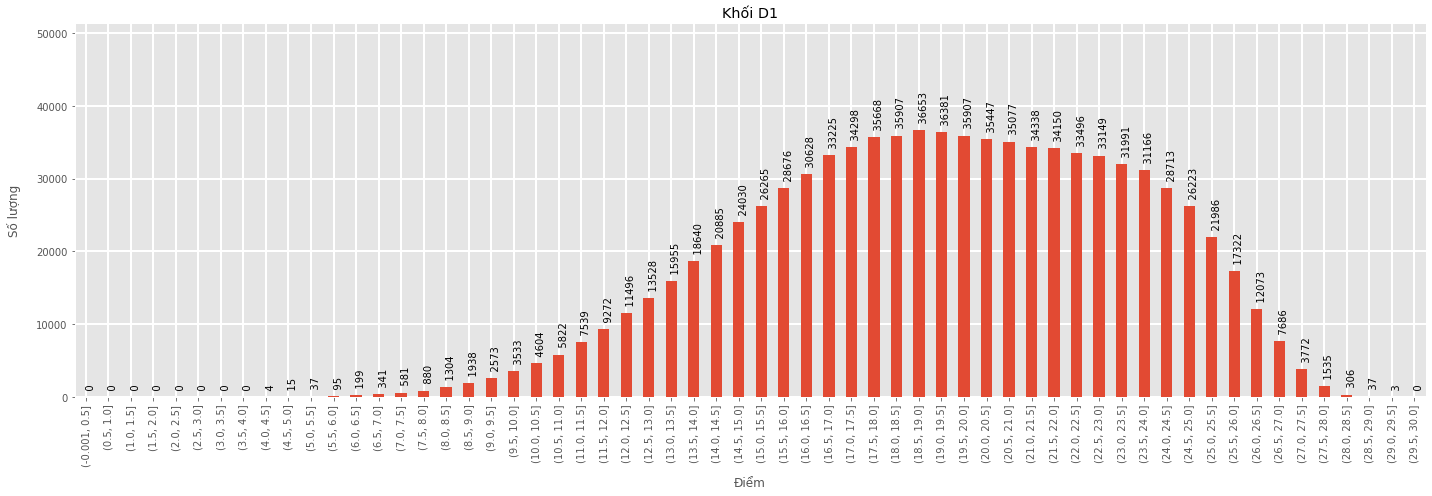

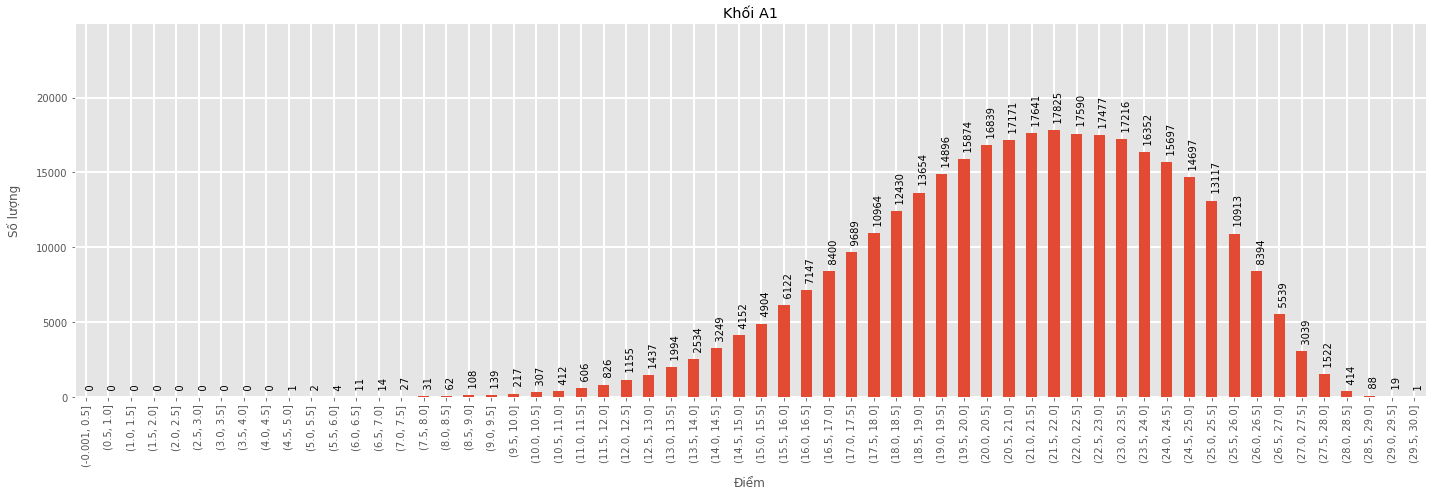

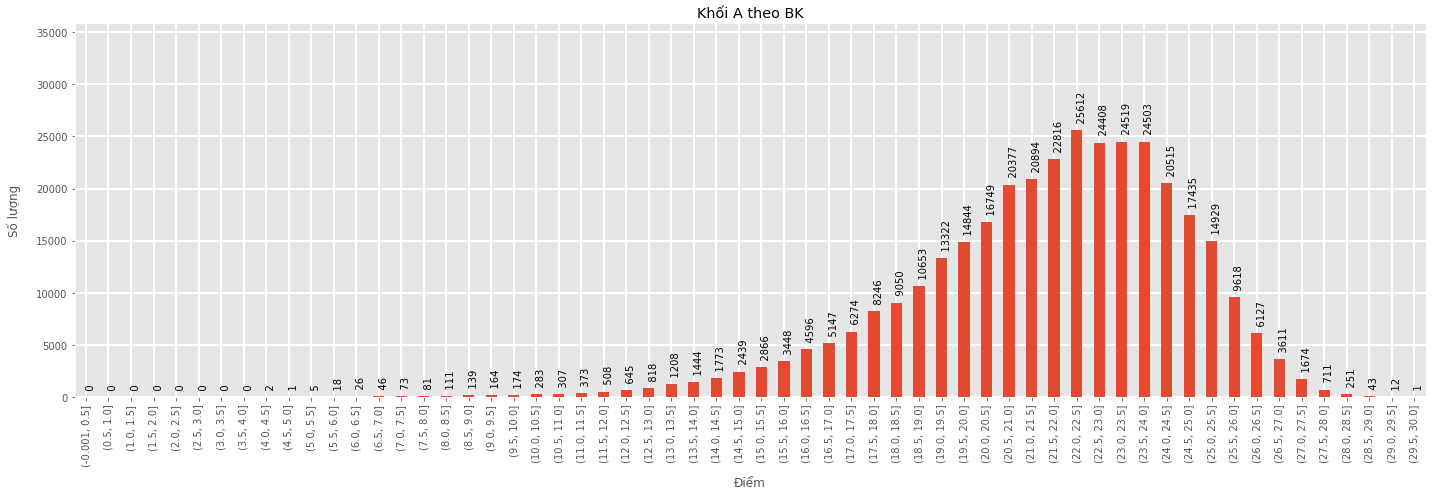

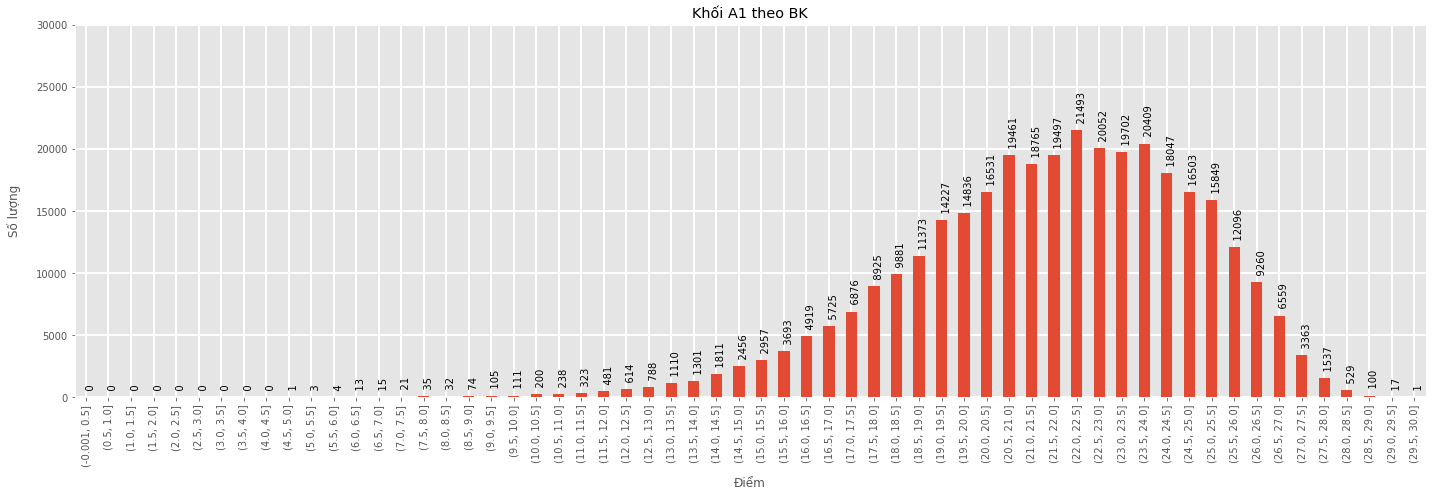

In [69]:
for node in ma_Monhoc:
  phodiem(data, node['Mon_hoc'], node['Ten'])